In [21]:
import pandas as pd

# Ruta al archivo descargado (ajustá si el nombre difiere)
ruta = r"C:\Users\facun\Downloads\sube-operaciones-rmba.csv"
df = pd.read_csv(ruta)

# Limpieza de columnas (por si tienen espacios)
df.columns = df.columns.str.strip()

# 1. Convertir columna 'DIA_TRANSPORTE' a datetime
df['DIA_TRANSPORTE'] = pd.to_datetime(df['DIA_TRANSPORTE'], errors='coerce')

# 2. Filtrar solo los datos del año 2024
df_2024 = df[df['DIA_TRANSPORTE'].dt.year == 2024]

# 3. Verificar y mostrar valores faltantes por columna
print("Valores faltantes en el dataset 2024:")
print(df_2024.isnull().sum())

# 4. Eliminar filas con valores faltantes en columnas clave
df_2024_cleaned = df_2024.dropna(subset=['CANTIDAD', 'TIPO_TRANSPORTE'])

# 5. Confirmar que las columnas clave están limpias
print("\nDespués de la limpieza:")
print(df_2024_cleaned[['CANTIDAD', 'TIPO_TRANSPORTE']].isnull().sum())



Valores faltantes en el dataset 2024:
DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2522
PROVINCIA          2537
MUNICIPIO          2537
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64

Después de la limpieza:
CANTIDAD           0
TIPO_TRANSPORTE    0
dtype: int64


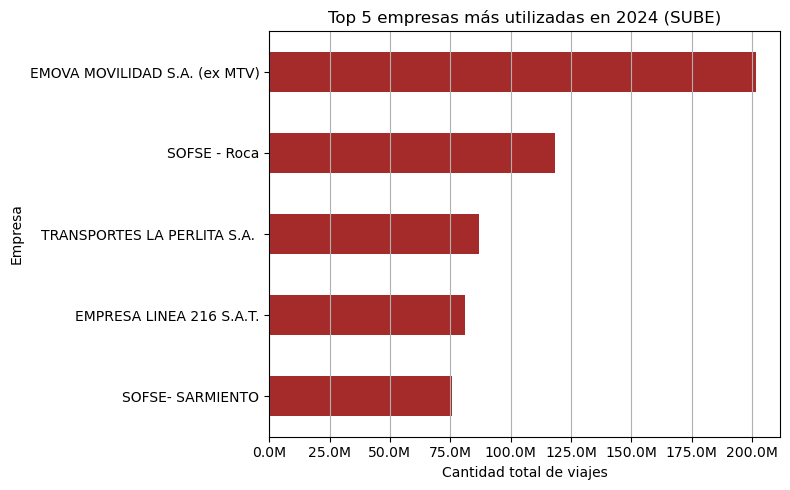

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Ruteamos el archivo de donde se encuentra el docmuento
ruta = r"C:\Users\facun\Downloads\sube-operaciones-rmba.csv"
df = pd.read_csv(ruta)

# Limpiamos las columnas
df.columns = df.columns.str.strip()

# Convertir fecha
df['DIA_TRANSPORTE'] = pd.to_datetime(df['DIA_TRANSPORTE'], errors='coerce')

# Filtramos por el año 2024
df_2024 = df[df['DIA_TRANSPORTE'].dt.year == 2024]

# Limpiamo datos faltantes
df_2024_clean = df_2024.dropna(subset=['CANTIDAD', 'NOMBRE_EMPRESA'])

# Agrupamos por empresa y seleccionamos Top 5
top_empresas = df_2024_clean.groupby('NOMBRE_EMPRESA')['CANTIDAD'].sum().sort_values(ascending=False).head(5)

# Gráficamps
ax = top_empresas.plot(kind='barh', color='brown', figsize=(8, 5))
ax.set_title("Top 5 empresas más utilizadas en 2024 (SUBE)")
ax.set_xlabel("Cantidad total de viajes")
ax.set_ylabel("Empresa")

# Invertimos el orden para que la más usada esté arriba
ax.invert_yaxis()

# Ajustamos para que se visualizen los numeros en millones
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M'))

plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


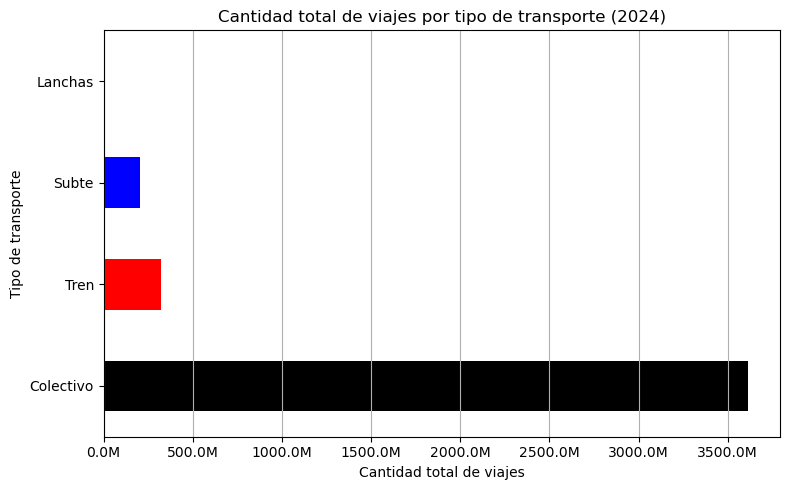

In [73]:
 import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Repetimos pasos anteriores

ruta = r"C:\Users\facun\Downloads\sube-operaciones-rmba.csv"
df = pd.read_csv(ruta)

df.columns = df.columns.str.strip()


df['DIA_TRANSPORTE'] = pd.to_datetime(df['DIA_TRANSPORTE'], errors='coerce')


df_2024 = df[df['DIA_TRANSPORTE'].dt.year == 2024]


df_2024_clean = df_2024.dropna(subset=['CANTIDAD', 'TIPO_TRANSPORTE']).copy()


df_2024_clean['TIPO_TRANSPORTE'] = df_2024_clean['TIPO_TRANSPORTE'].str.strip().str.capitalize()

# Agrupamos por tipo de transporte
viajes_por_transporte = df_2024_clean.groupby('TIPO_TRANSPORTE')['CANTIDAD'].sum().sort_values()


colores = {
    'Colectivo': 'black',
    'Tren': 'red',
    'Subte': 'blue'
}



ax = viajes_por_transporte.plot(kind='barh', color=colores_ordenados, figsize=(8, 5))
ax.set_title("Cantidad total de viajes por tipo de transporte (2024)")
ax.set_xlabel("Cantidad total de viajes")
ax.set_ylabel("Tipo de transporte")


ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M'))


ax.invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()
